line : 변화를 보기 위한 그래프로 많이 씀. 시간에 따른 변화 (multi_line : 시간에 따라서 두 값을 비교할 수 있음.)

bar : x값 각각의 y값의 변화. stacked으로 누적으로도 볼 수 있음 (한달간의 공부시간양. 전체 총량과 비교 가능.)
      (stacked을 쓰면 여러가지 속성을 한번에 볼 수 있음. (ex: 20210727의 공부시간, 자습시간, 쉬는시간 속성을 비교 확인 가능)
      
scatter : 두 변수의 관계를 볼 때 많이 씀

histogram : 도수분포표, 값이나 범위의 '빈도'가 어떤지 확인 할 수 있음. 평균을 기준으로 대칭되는 성질(도수분포표)

boxplot : 이상치 확인할때 많이 씀. 구조가 데이터의 전체를 구조적으로 보여줄 수 있으며, 이상치에 속하는 것들을 눈으로 표시하게 쉽도록 함.

pie : 분포를 확인할 때 씀


https://www.kaggle.com/sanjanabasu/tips-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips= pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Text(0.5, 1.0, 'Heatmap of the Dataset')

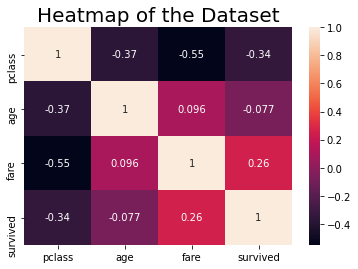

In [2]:
t_df= sns.load_dataset('titanic')
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [3]:
table= t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],
                       aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

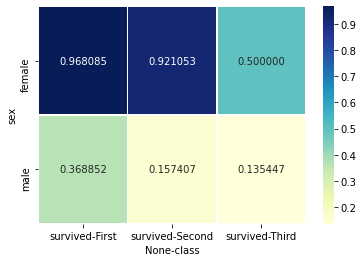

In [4]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap= 'YlGnBu',
           linewidth=0.5,
            cbar=True)

In [7]:
# 빈도 표 - 카테고리 형태의 데이터

party_counts= pd.crosstab(tips['day'],tips['size']) # 요일별 테이블사이즈
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [14]:
pd.pivot_table(tips,index=['day'],columns=['size'],
               values=['tip'],aggfunc='count',
              fill_value=0)
# Na때문에 실수가 됐던거라서 fill_value=0 으로 두면 Na값 사라지면서
# 정수로 바뀜 

# tips.pivot_table(index=['day'],columns=['size'],values=['tip'],aggfunc='count')

# pd.pivot_table(index = 'day',columns='size',values='tip',aggfunc='count',data=tips).fillna(0).astype(int)


tip                  
size   1   2   3   4  5  6
day                       
Fri    1  16   1   1  0  0
Sat    2  53  18  13  1  0
Sun    0  39  15  18  3  1
Thur   1  48   4   5  1  3

In [16]:
pc_25= party_counts.loc[:,2:5]  # loc 는 컬럼값 
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [17]:
pc_25.sum() # 컬럼별 합 

size
2    156
3     38
4     37
5      5
dtype: int64

In [19]:
pc_25.sum(1) # 인덱스별 합 

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [26]:
# pc_25 각 열방향 합계 1로 정규화 

pc_25.apply(lambda x : x/pc_25.sum(1))
# pc_25.apply(lambda x : x/x.sum())  # 인덱스방향

#pc_25.div(pc_25.sum(1),axis=0)


size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:ylabel='day'>

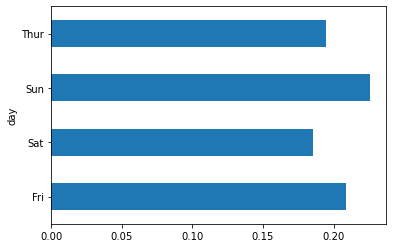

In [39]:
# 요일별 팁의 비중을 시각화 

tips['tip_pct']= tips['tip']/(tips['total_bill']-tips['tip']) # tip 비중

# pd.pivot_table(tips,index=['day'],
#                values=['tip_pct'],aggfunc='mean')

tips.groupby('day').tip_pct.mean().plot(kind = 'barh')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

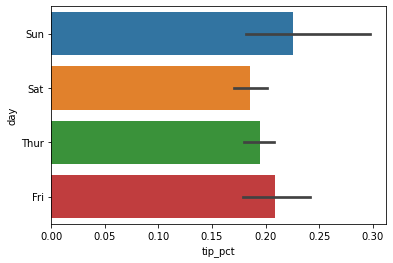

In [48]:
import seaborn as sns 

tips['tip_pct']= tips['tip']/(tips['total_bill']-tips['tip']) # tip 비중

sns.barplot(x='tip_pct',y='day', data=tips,orient='h') # vertical or horizontal

# 막대? 긴 막대는 신뢰구간 ! 삭제하려면 ci=None

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

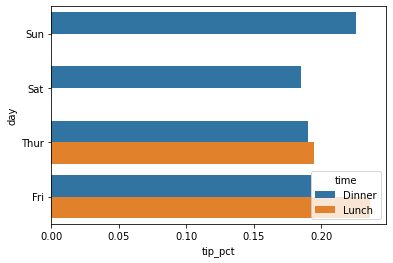

In [50]:
sns.barplot(x='tip_pct',y='day',hue='time', data=tips,orient='h',ci=None)

<AxesSubplot:xlabel='size', ylabel='count'>

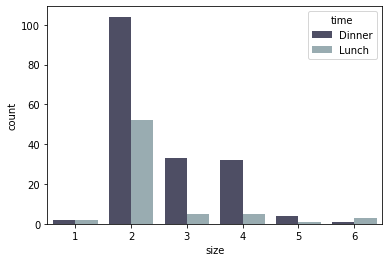

In [57]:
# countplot()
import warnings
warnings.filterwarnings('ignore')
sns.countplot('size', data=tips,hue='time',palette='bone')

항목별 갯수를 세어주는 countplot

 http://growthj.link/python-seaborn-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-%EC%B4%9D%EC%A0%95%EB%A6%AC/

In [60]:
# np.random.normal(loc,scale,size): 정규분포 난수 샘플
comp1= np.random.normal(0,1,size=200)
comp2= np.random.normal(10,2,size=200)
values= pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       4.996573
std        5.196057
min       -2.928016
25%        0.047890
50%        3.955378
75%        9.908238
max       15.418937
dtype: float64

<AxesSubplot:ylabel='Density'>

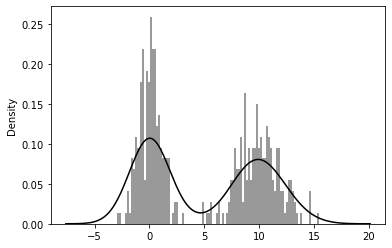

In [64]:
sns.distplot(values,bins=100, color='k')

# 선 삭제하려면 , kde=False 추가 

<AxesSubplot:ylabel='Count'>

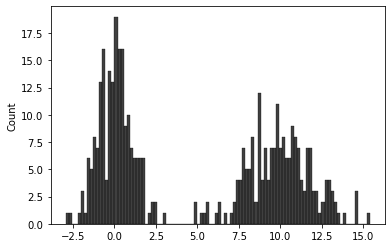

In [62]:
sns.histplot(values,bins=100, color='k' )

# 선 나타내주려면 , kde=True 추가 

In [65]:
fish_multi= pd.read_csv('dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<AxesSubplot:xlabel='length', ylabel='Count'>

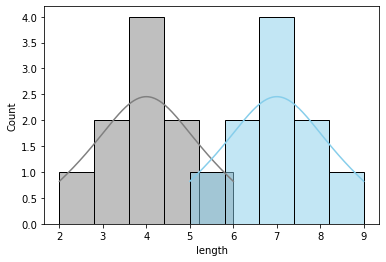

In [75]:
length_a= fish_multi.query('species=="A"')['length']
length_b= fish_multi.query('species=="B"')['length']

sns.histplot(length_a,bins=5,color='gray',kde=True)
sns.histplot(length_b,bins=5,color='skyblue',kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

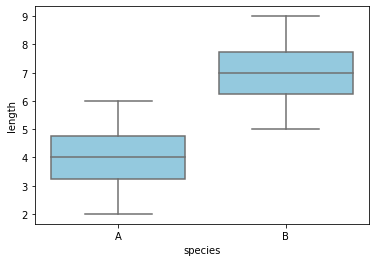

In [81]:
# boxplot
sns.boxplot(x='species',y='length',data=fish_multi, color='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

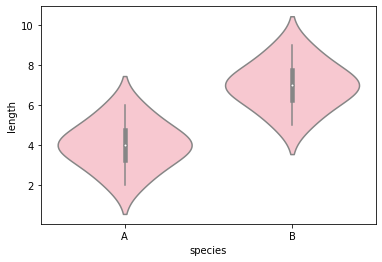

In [82]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species',y='length',data=fish_multi,color='pink')

<AxesSubplot:>

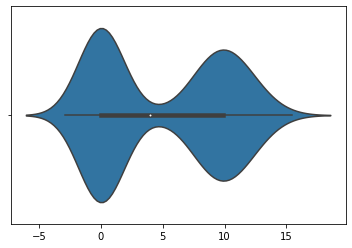

In [83]:
sns.violinplot(values)


In [84]:
cov_data= pd.read_csv('dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


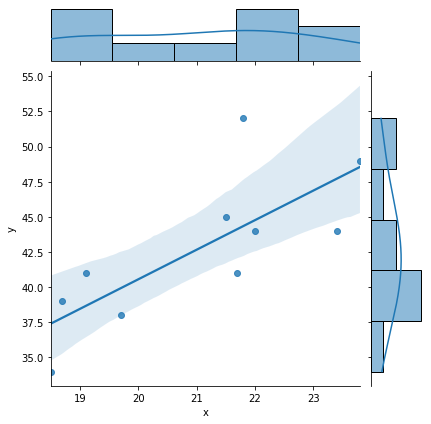

In [85]:
sns.jointplot(cov_data.x, cov_data.y, kind='reg') # regration :회귀


In [86]:
df_auto= pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


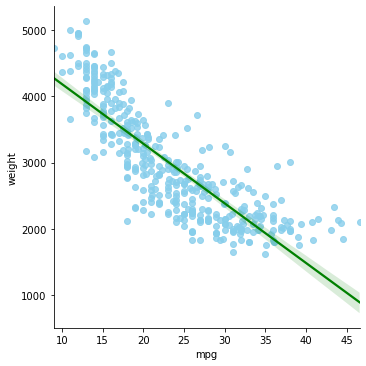

In [91]:
sns.lmplot(x='mpg', y='weight',data= df_auto, scatter_kws={'color':'skyblue'},
           line_kws={'color':'green'})


<AxesSubplot:xlabel='mpg', ylabel='weight'>

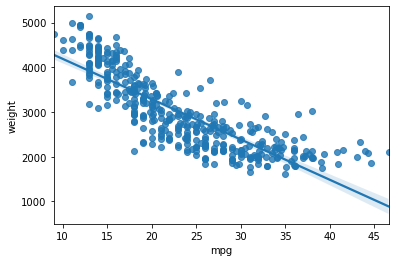

In [93]:
# sns.regplot(x='mpg',y='weight', data=df_auto, fit_reg=False)

sns.regplot(x='mpg',y='weight', data=df_auto)

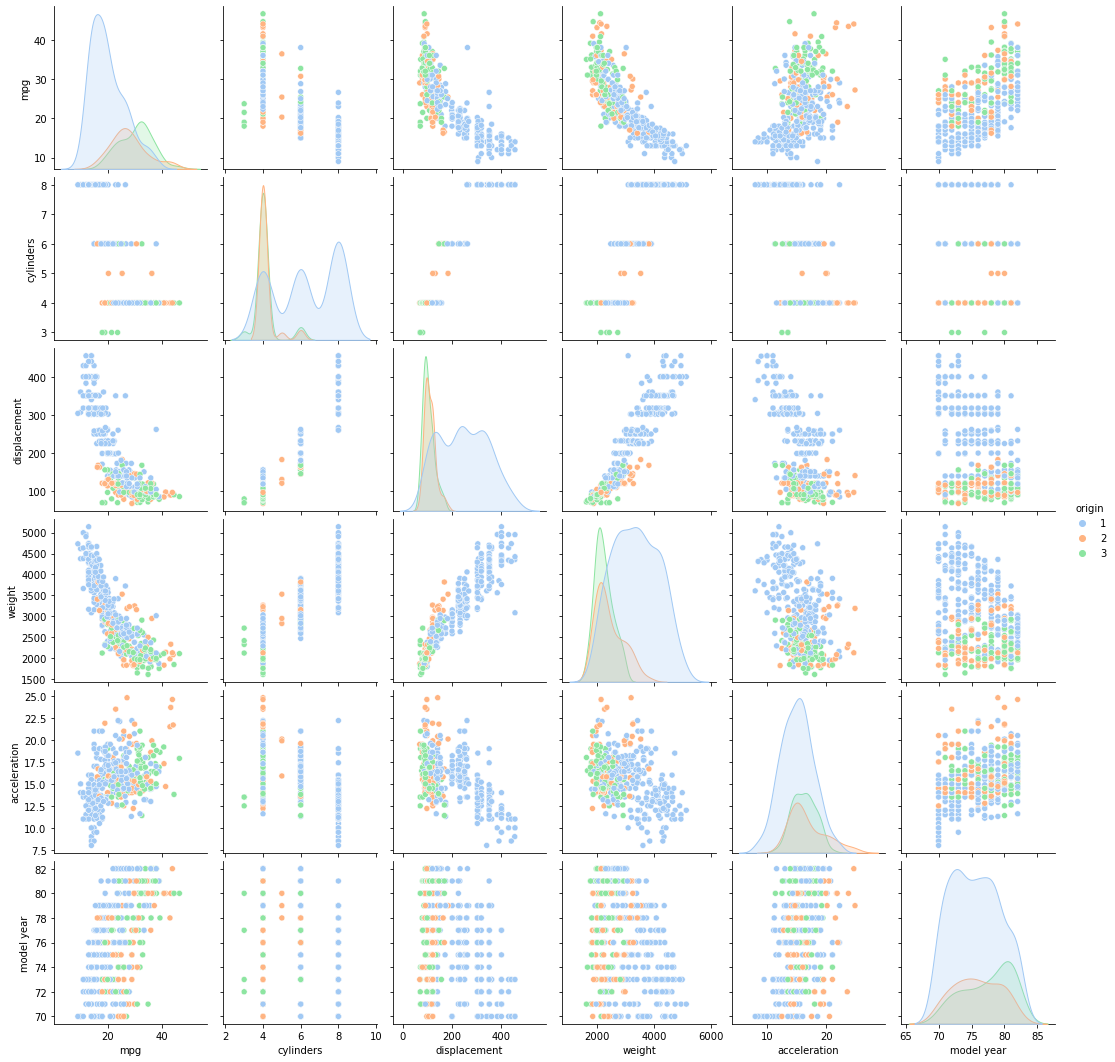

In [99]:
sns.pairplot(df_auto, palette='pastel',hue='origin')


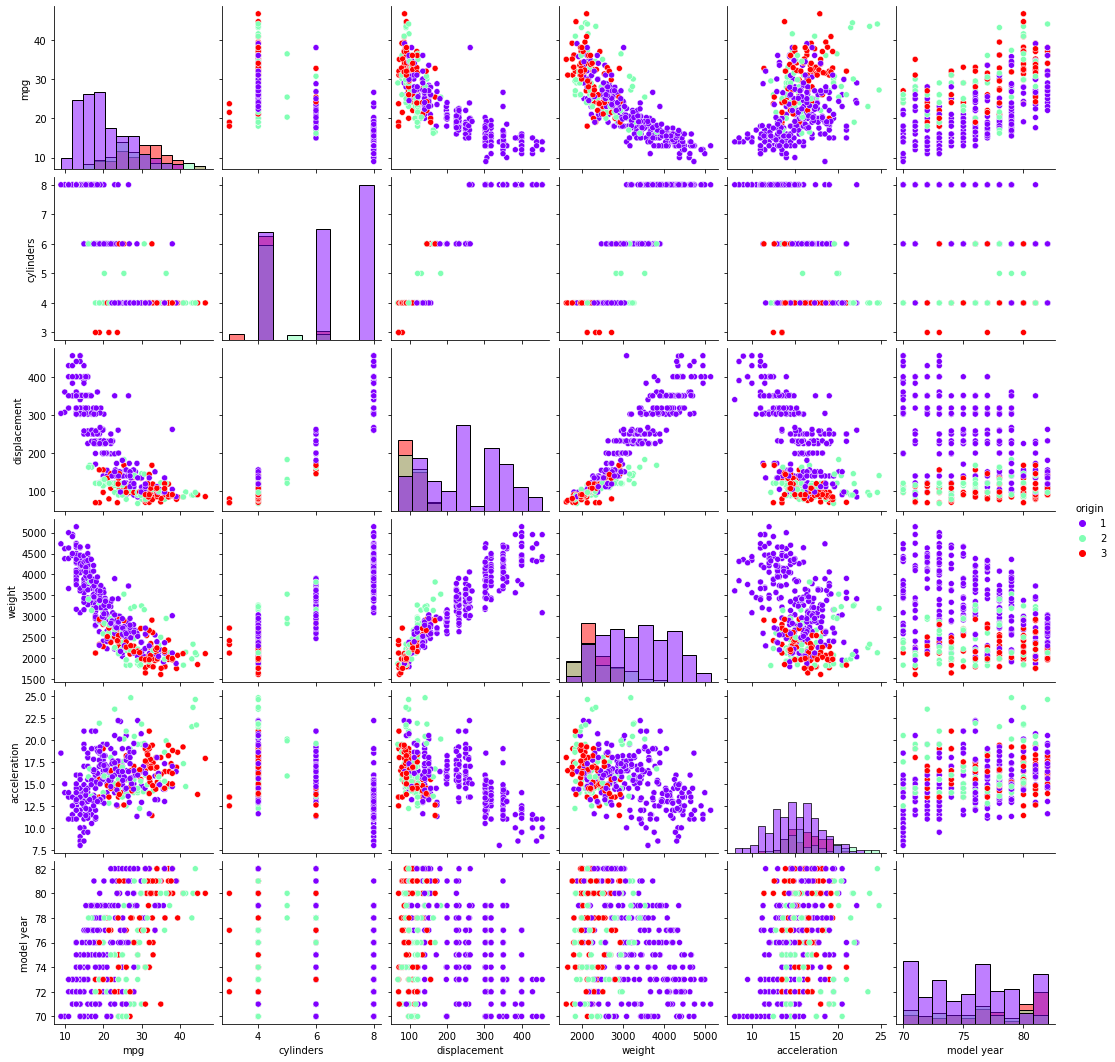

In [100]:
sns.pairplot(df_auto, palette='rainbow',hue='origin',diag_kind ='hist'
)


In [106]:
import numpy as np
fish_data= np.array([5,7,9,1,5,6,6,2,4,4,5,6,7,3,8,10])

<AxesSubplot:ylabel='Count'>

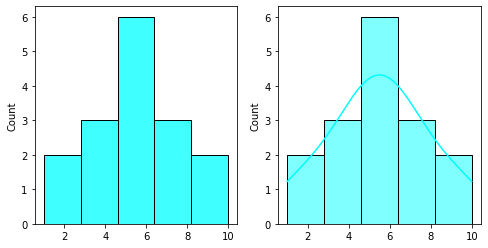

In [110]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(8,4))
ax1= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(1,2,2)
sns.histplot(fish_data, color='aqua',kde=False, ax=ax1)
sns.histplot(fish_data, color='aqua',kde=True, ax=ax2)

In [ ]:
sns.barplot(x='tip_pct',y='day',hue='time', data=tips,orient='h',ci=None)